In [1]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy
from tqdm import tqdm
import numpy as np
from sklearn.metrics.pairwise import euclidean_distances


x,y = make_classification(n_samples=10000, n_features=2, n_informative=2, n_redundant= 0, n_clusters_per_class=1, random_state=60)
X_train, X_test, y_train, y_test = train_test_split(x,y,stratify=y,random_state=42)

# del X_train,X_test

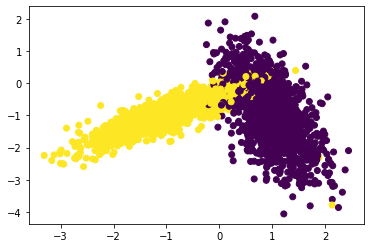

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
colors = {0:'red', 1:'blue'}
plt.scatter(X_test[:,0], X_test[:,1],c=y_test)
plt.show()

# Implementing Custom RandomSearchCV

In [13]:
def random_10_params(param_range):
    random_10_paramas = random.sample(range(1, param_range), 10)   
    random_10_paramas.sort()
    return random_10_paramas

def RandomSearch(x_train, y_train, classifier, params, folds):
    trainscores = []
    testscores =[]
    
    k_range = random_10_params(params)
    
    params= {'n_neighbors': k_range}
    
    for k in tqdm(params['n_neighbors']):
        trainscore_k_folds =[]
        testscore_k_folds = []
        for no_of_folds in range(0,folds):
            values = (len(x_train)/folds)
            boundary = int(values)
            
            test_indices = list(set(list(range((boundary*no_of_folds), boundary*(no_of_folds+1)))))
            train_indices = list(set(list(range(0, len(x_train)))) - set (test_indices))
            
            X_train = x_train[train_indices]
            Y_train = y_train[train_indices]
            
            X_test = x_train[test_indices]
            Y_test = y_train[test_indices]
            
            classifier.n_neighbors = k
            classifier.fit(X_train, Y_train)
            
            Y_predicted = classifier.predict(X_test)
            
            testscore_k_folds.append(accuracy_score(Y_test, Y_predicted))
            
            Y_predicted = classifier.predict(X_train)
            
            trainscore_k_folds.append(accuracy_score(Y_train, Y_predicted))
            
        trainscores.append(np.mean(np.array(trainscore_k_folds)))
        testscores.append(np.mean(np.array(testscore_k_folds)))
        
    return trainscores,testscores,params
        
    

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:16<00:00,  1.65s/it]


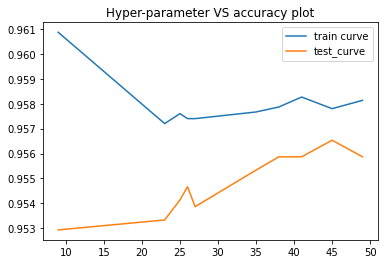

{'n_neighbors': [9, 23, 25, 26, 27, 35, 38, 41, 45, 49]}


In [17]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import random
import warnings
warnings.filterwarnings("ignore")

neigh = KNeighborsClassifier()
param_range=50
folds=3
trainscores,testscores,param= RandomSearch(X_train, y_train, neigh, param_range, folds)

plt.plot(param['n_neighbors'], trainscores, label='train curve')
plt.plot(param['n_neighbors'], testscores, label= 'test_curve')
plt.title('Hyper-parameter VS accuracy plot')
plt.legend()
plt.show()

print(param)


In [18]:
# understanding this code line by line is not that importent 
def plot_decision_boundary(X1, X2, y, clf):
        # Create color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

    x_min, x_max = X1.min() - 1, X1.max() + 1
    y_min, y_max = X2.min() - 1, X2.max() + 1
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    # Plot also the training points
    plt.scatter(X1, X2, c=y, cmap=cmap_bold)
    
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("2-Class classification (k = %i)" % (clf.n_neighbors))
    plt.show()

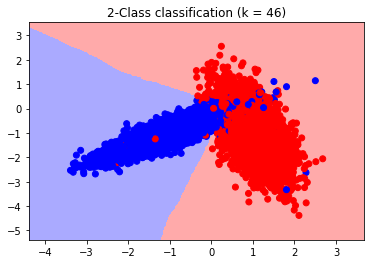

In [19]:
from matplotlib.colors import ListedColormap
neigh = KNeighborsClassifier(n_neighbors = 46)
neigh.fit(X_train, y_train)
plot_decision_boundary(X_train[:, 0], X_train[:, 1], y_train, neigh)